In [2]:
import pandas as pd

column = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level']

train_data = pd.read_csv('docs/KDDTrain+.txt', header=None, names=column)
test_data = pd.read_csv('docs/KDDTest+.txt', header=None, names=column)
df = pd.concat([train_data, test_data], axis=0)
del train_data, test_data
df = df.drop('level', axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148517 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13  root_

In [4]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"Numerical columns:\n{numerical_cols}\nNumber of numerical columns: {len(numerical_cols)}\n")
print(f"Categorical columns:\n{categorical_cols}\nNumber of categorical columns: {len(categorical_cols)}\n")
print(f"Dataset shape: {df.shape}")

Numerical columns:
Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')
Number of numerical columns: 38

Categorical columns:
Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')
Number of categorical columns: 4

Dataset shape: (148517, 

In [5]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [6]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,183.928042,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,98.528328,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
for i in categorical_cols:
    print(f"{i}: {df[i].unique()}\n")

protocol_type: ['tcp' 'udp' 'icmp']

service: ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

flag: ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']

attack: ['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl' 'saint' 'mscan' 'ap

<Axes: xlabel='count', ylabel='attack'>

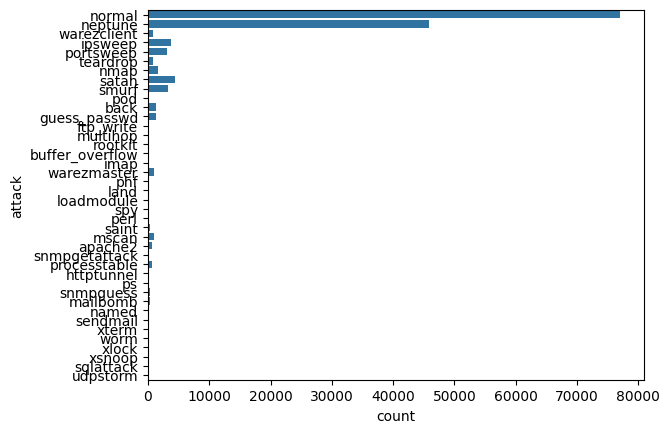

In [8]:
import seaborn as sns
sns.countplot(df['attack'])

In [9]:
df.loc[df['attack'] != 'normal', 'attack'] = 'attack'
df.loc[df['attack'] == 'normal', 'attack'] = 'normal'

df['attack'].value_counts()

attack
normal    77054
attack    71463
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='attack'>

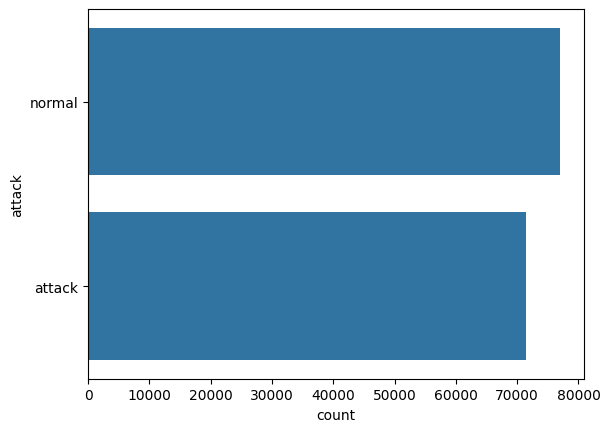

In [10]:
sns.countplot(df['attack'])

flag
SF        89820
S0        36864
REJ       15083
RSTR       3090
RSTO       2335
S1          386
SH          344
S3          298
S2          142
RSTOS0      105
OTH          50
Name: count, dtype: int64

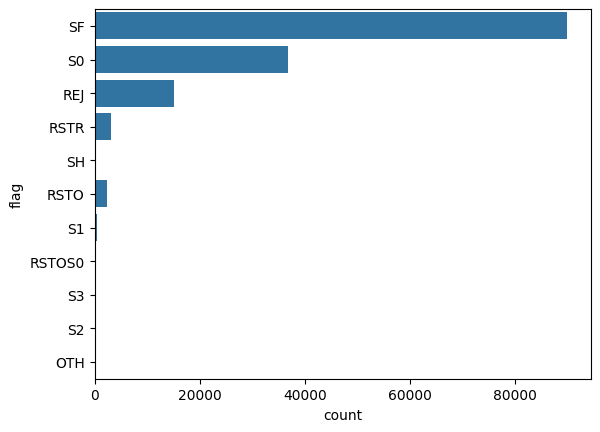

In [11]:
sns.countplot(df['flag'])
df['flag'].value_counts()

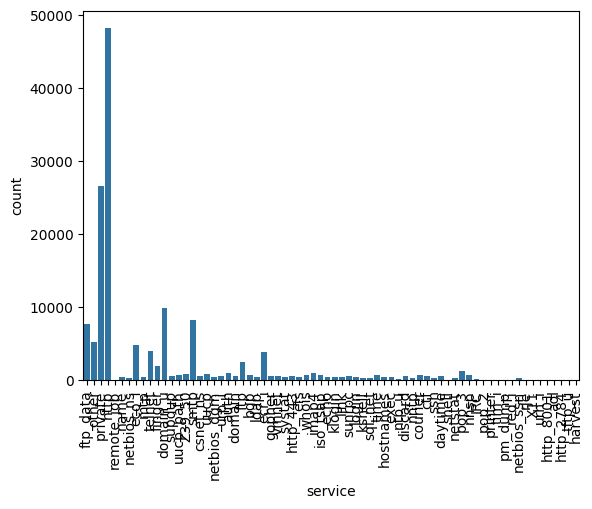

In [12]:
import matplotlib.pyplot as plt

sns.countplot(x=df['service'])
plt.xticks(rotation=90)
plt.show()

In [13]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,183.928042,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,98.528328,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler, OrdinalEncoder
import pickle

X = df.drop('attack', axis=1)
y = df['attack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

encoders = {}
scalers = {}

for col in categorical_cols:
  if col == 'attack':
    continue
  encoders[col] = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
  X_train[col] = encoders[col].fit_transform(X_train[[col]])
  X_test[col] = encoders[col].transform(X_test[[col]])

for col in numerical_cols:
  scalers[col] = RobustScaler()
  X_train[col] = scalers[col].fit_transform(X_train[[col]])
  X_test[col] = scalers[col].transform(X_test[[col]])

target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(y_train)
y_test = target_encoder.transform(y_test)

In [15]:
X_train.shape

(111387, 41)

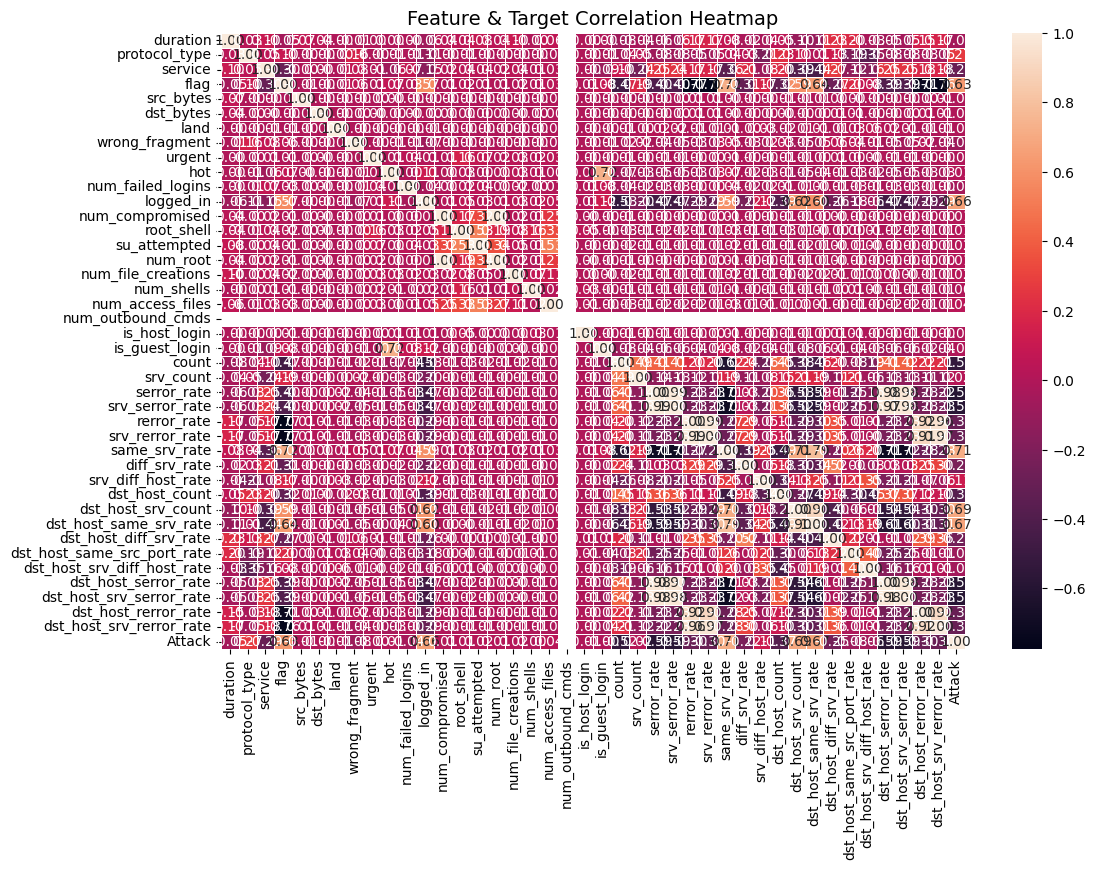

In [16]:
import numpy as np

X_train_sample = X_train.copy()
X_train_sample["Attack"] = y_train
corr_matrix = X_train_sample.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature & Target Correlation Heatmap", fontsize=14)
plt.show()

In [17]:
THRESHOLD = 0.2
selected_features = corr_matrix.index[corr_matrix["Attack"].abs() > THRESHOLD].tolist()
selected_features.remove("Attack")
print(f"{len(selected_features)} columns have thier correlation with target > {THRESHOLD}:")
print(selected_features)

19 columns have thier correlation with target > 0.2:
['protocol_type', 'service', 'flag', 'logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [18]:
X_train_corr = X_train[selected_features]
X_test_corr = X_test[selected_features]
print(f"Original shape: {X_train.shape}\nNew shape: {X_train_corr.shape}")

Original shape: (111387, 41)
New shape: (111387, 19)


<Axes: title={'center': 'Feature Importance'}>

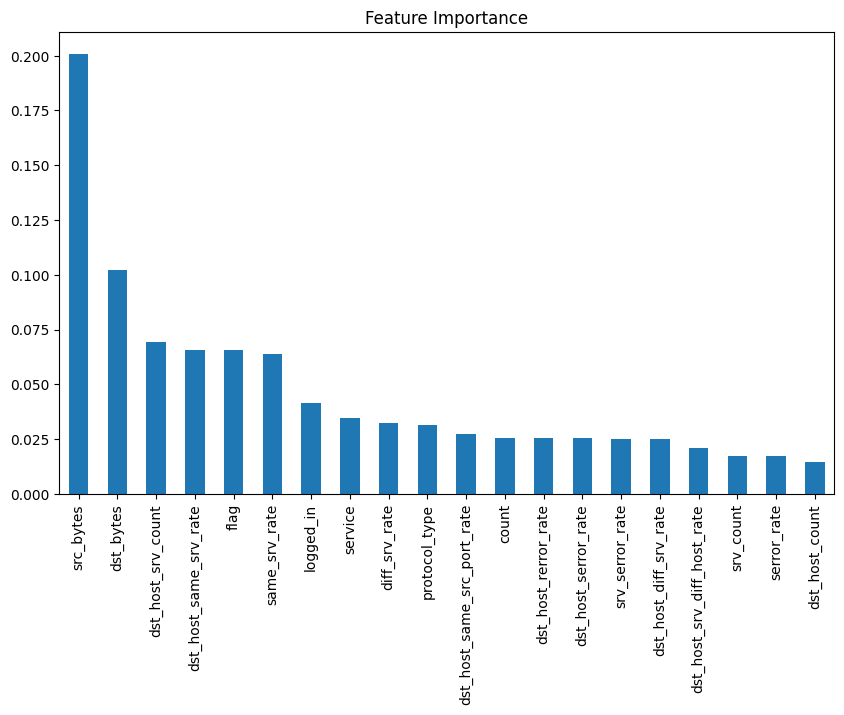

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

feature_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.nlargest(20)
feature_importances.head(20).plot(kind='bar', figsize=(10, 6), title="Feature Importance")

In [20]:
#Final feature selection by combining outputs of random forest and correlation
hybrid_features = list(set(selected_features) & set(feature_importances.index.tolist()))
len(hybrid_features)

print(f"Random Forest and Correlation have {len(hybrid_features)} common attributes, they are")
print(hybrid_features)

X_test_hybrid = X_test[hybrid_features]
X_train_hybrid = X_train[hybrid_features]

Random Forest and Correlation have 15 common attributes, they are
['count', 'logged_in', 'service', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'serror_rate', 'dst_host_serror_rate', 'dst_host_srv_count', 'diff_srv_rate', 'srv_serror_rate', 'dst_host_count', 'dst_host_same_srv_rate', 'flag', 'protocol_type', 'same_srv_rate']


In [21]:
#Class imbalance check
unique, counts = np.unique(y_train, return_counts=True)
print("Class Distribution in y_train:")
for u, c in zip(unique, counts):
    print(f"Class {u}: {c} ({c / len(y_train) * 100:.2f}%)")

Class Distribution in y_train:
Class 0: 53601 (48.12%)
Class 1: 57786 (51.88%)


In [22]:
#Random Forest
from sklearn.metrics import classification_report, accuracy_score

rfc_classifier = RandomForestClassifier(random_state=42)
rfc_classifier.fit(X_train_hybrid, y_train)

RandomForestClassifier(random_state=42)

In [23]:
feature_importances = pd.Series(rfc_classifier.feature_importances_, index=X_train_hybrid.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print(feature_importances.head(20))

flag                      0.171101
dst_host_srv_count        0.095508
same_srv_rate             0.092801
diff_srv_rate             0.079830
protocol_type             0.075077
dst_host_same_srv_rate    0.074200
service                   0.072565
logged_in                 0.064599
dst_host_rerror_rate      0.059236
count                     0.055341
dst_host_diff_srv_rate    0.055119
dst_host_count            0.050558
dst_host_serror_rate      0.019745
serror_rate               0.017637
srv_serror_rate           0.016681
dtype: float64


In [24]:
top_features = ["flag", "same_srv_rate", "dst_host_srv_count", "service", "logged_in"]

for feature in top_features:
    corr = np.corrcoef(X_train_hybrid[feature], y_train)[0, 1]
    print(f"Correlation between {feature} and target: {corr:.4f}")

Correlation between flag and target: 0.6295
Correlation between same_srv_rate and target: 0.7094
Correlation between dst_host_srv_count and target: 0.6933
Correlation between service and target: -0.2939
Correlation between logged_in and target: 0.6639


In [25]:
high_corr_features = ["same_srv_rate", "dst_host_srv_count", "logged_in", "flag"]

X_train_final = X_train_hybrid.drop(columns=high_corr_features)
X_test_final = X_test_hybrid.drop(columns=high_corr_features)

In [26]:
print(f"Original df: X:{X.shape}\t y:{y.shape}")
print(f"Initial split: X_train:{X_train.shape}\ty_train:{y_train.shape}\tX_test:{X_test.shape}\ty_test:{y_test.shape}")
print(f"Feature selection: X_train:{X_train_hybrid.shape}\ty_train:{y_train.shape}\tX_test:{X_test_hybrid.shape}\ty_test:{y_test.shape}")
print(f"Final selection: X_train:{X_train_final.shape}\ty_train:{y_train.shape}\tX_test:{X_test_final.shape}\ty_test:{y_test.shape}")

Original df: X:(148517, 41)	 y:(148517,)
Initial split: X_train:(111387, 41)	y_train:(111387,)	X_test:(37130, 41)	y_test:(37130,)
Feature selection: X_train:(111387, 15)	y_train:(111387,)	X_test:(37130, 15)	y_test:(37130,)
Final selection: X_train:(111387, 11)	y_train:(111387,)	X_test:(37130, 11)	y_test:(37130,)


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

#Decision Tree
dtc_1 = DecisionTreeClassifier(random_state=42)

param_dist = {
    "max_depth": [None, 10, 20, 30, 50, 100],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "ccp_alpha": np.linspace(0.0005, 0.02, 10)
}

random_search = RandomizedSearchCV(dtc_1, param_dist, n_iter=20, cv=3, scoring="accuracy", n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train_final, y_train)

dtc_classifier = DecisionTreeClassifier(**random_search.best_params_, random_state=42)
dtc_classifier.fit(X_train_final, y_train)

y_pred = dtc_classifier.predict(X_test_final)
dtc_train_score = dtc_classifier.score(X_train_final, y_train)
dtc_test_score = dtc_classifier.score(X_test_final, y_test)
dtc_accuracy = accuracy_score(y_test, y_pred)
dtc_classification_report = classification_report(y_test, y_pred)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [28]:
#Random Forest
rfc1 = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'ccp_alpha': np.linspace(0.0005, 0.02, 10)
}

random_search1 = RandomizedSearchCV(rfc1, param_dist, n_iter=20, cv=3, scoring="accuracy", n_jobs=-1, verbose=1, random_state=42)
random_search1.fit(X_train_final, y_train)

rfc_classifier = RandomForestClassifier(**random_search1.best_params_, random_state=42)
rfc_classifier.fit(X_train_final, y_train)

y_pred = rfc_classifier.predict(X_test_final)
rfc_classifier_train_score = rfc_classifier.score(X_train_final, y_train)
rfc_test_score = rfc_classifier.score(X_test_final, y_test)
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_classification_report = classification_report(y_test, y_pred)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [29]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes
gnb = GaussianNB()
param_dist = {
    'var_smoothing': np.logspace(-12, -3, 10)
}

random_search = RandomizedSearchCV(gnb, param_dist, n_iter=20, cv=3, scoring="accuracy", n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train_final, y_train)

gnb_classifier = GaussianNB(**random_search.best_params_)
gnb_classifier.fit(X_train_final, y_train)
y_pred = gnb_classifier.predict(X_test_final)
gnb_train_score = gnb_classifier.score(X_train_final, y_train)
gnb_test_score = gnb_classifier.score(X_test_final, y_test)
gnb_accuracy = accuracy_score(y_test, y_pred)
gnb_classification_report = classification_report(y_test, y_pred)

c:\Users\Anirudh\Desktop\Desk\nsl\myenv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [30]:
from sklearn.ensemble import StackingClassifier

# Stacking Classifier
stack = StackingClassifier(
    estimators=[("dt", dtc_classifier), ("nb", gnb_classifier)],
    final_estimator=rfc_classifier,
    passthrough=True
)

stack.fit(X_train_final, y_train)
pred_stack = stack.predict(X_test_final)
stack_train_score = stack.score(X_train_final, y_train)
stack_test_score = stack.score(X_test_final, y_test)
stack_accuracy = accuracy_score(y_test, pred_stack)
stack_classification_report = classification_report(y_test, pred_stack)
print(f"Accuracy: {round(stack_accuracy) * 100, 4}%")

Accuracy: (100, 4)%


In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

# BaggingClassifier
bagg = BaggingClassifier(
    estimator=gnb_classifier,           # Base model (weak learner)
    n_estimators=50,            # Number of estimators (trees)
    max_samples=0.7,            # Each model trains on 70% of the data
    bootstrap=True,             # Sampling with replacement
    random_state=42,
)

bagg.fit(X_train_final, y_train)

BaggingClassifier(estimator=GaussianNB(var_smoothing=0.0001), max_samples=0.7,
                  n_estimators=50, random_state=42)

In [32]:
pred_bagg = bagg.predict(X_test_final)
bagg_train_score = bagg.score(X_train_final, y_train)
bagg_test_score = bagg.score(X_test_final, y_test)
bagg_classification_report = classification_report(y_test, pred_bagg)
bagg_accuracy = accuracy_score(y_test, pred_bagg)
print(f"Accuracy: {round(bagg_accuracy * 100, 4)}%")

Accuracy: 86.2322%


In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

#AdaBoost
adaBoost = AdaBoostClassifier(estimator=rfc_classifier, random_state=42)
adaBoost.fit(X_train_final, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                    ccp_alpha=0.0005,
                                                    max_depth=30,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    n_estimators=300,
                                                    random_state=42),
                   random_state=42)

In [34]:
pred_adaBoost = adaBoost.predict(X_test_final)
ada_train_score = adaBoost.score(X_train_final, y_train)
ada_test_score = adaBoost.score(X_test_final, y_test)
ada_classification_report = classification_report(y_test, pred_adaBoost)
ada_accuracy = accuracy_score(y_test, pred_adaBoost)

In [35]:
from catboost import CatBoostClassifier

# CatBoost model
catboost_clf = CatBoostClassifier(
    loss_function="Logloss",
    verbose=0,
    random_seed=42
)

catboost_clf.fit(X_train_final, y_train)

In [36]:
pred_catboost = catboost_clf.predict(X_test_final)
cat_train_score = catboost_clf.score(X_train_final, y_train)
cat_test_score = catboost_clf.score(X_test_final, y_test)
cat_classification_report = classification_report(y_test, pred_catboost)
cat_accuracy = accuracy_score(y_test, pred_catboost)

In [37]:
import xgboost as xgb
from xgboost import XGBClassifier, DMatrix, cv as xgb_cv

# Construct DMatrix
dtrain = xgb.DMatrix(X_train_final, label=y_train)
dtest = xgb.DMatrix(X_test_final, label=y_test)  # Optional

params = {
    "objective": "binary:logistic",  # Change based on your task (e.g., 'multi:softmax' for multi-class)
    "eval_metric": "logloss",  # Change based on your needs (e.g., 'rmse', 'auc')
    "learning_rate": 0.1,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
}

xgb_clf = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)


[0]	Test-logloss:0.61222
[1]	Test-logloss:0.54459
[2]	Test-logloss:0.49384
[3]	Test-logloss:0.44561
[4]	Test-logloss:0.40689
[5]	Test-logloss:0.37099
[6]	Test-logloss:0.34079
[7]	Test-logloss:0.31472
[8]	Test-logloss:0.29264
[9]	Test-logloss:0.27039
[10]	Test-logloss:0.25167
[11]	Test-logloss:0.23716
[12]	Test-logloss:0.22088
[13]	Test-logloss:0.20726
[14]	Test-logloss:0.19459
[15]	Test-logloss:0.18582
[16]	Test-logloss:0.17520
[17]	Test-logloss:0.16639
[18]	Test-logloss:0.15942
[19]	Test-logloss:0.14951
[20]	Test-logloss:0.14209
[21]	Test-logloss:0.13577
[22]	Test-logloss:0.12990
[23]	Test-logloss:0.12604
[24]	Test-logloss:0.12056
[25]	Test-logloss:0.11699
[26]	Test-logloss:0.11339
[27]	Test-logloss:0.10917
[28]	Test-logloss:0.10441
[29]	Test-logloss:0.10023
[30]	Test-logloss:0.09708
[31]	Test-logloss:0.09417
[32]	Test-logloss:0.09167
[33]	Test-logloss:0.08977
[34]	Test-logloss:0.08814
[35]	Test-logloss:0.08653
[36]	Test-logloss:0.08423
[37]	Test-logloss:0.08248
[38]	Test-logloss:0.08

In [38]:
# Make predictions
xgb_test_preds = xgb_clf.predict(dtest)
xgb_train_preds = xgb_clf.predict(dtrain)
xgb_train_labels = (xgb_train_preds > 0.5).astype(int)
xgb_test_labels = (xgb_test_preds > 0.5).astype(int)

y_pred = np.round(xgb_test_preds)
xgb_accuracy = accuracy_score(y_test, y_pred)

xgb_train_score = accuracy_score(y_train, xgb_train_labels)
xgb_test_score = accuracy_score(y_test, xgb_test_labels)

In [39]:
from sklearn.ensemble import GradientBoostingClassifier


gb_clf = GradientBoostingClassifier(
    n_estimators=1000,  # Large number, but early stopping will stop it early
    learning_rate=0.1,
    max_depth=3,
    validation_fraction=0.25,
    n_iter_no_change=10,  # Stops if no improvement for 10 rounds
    tol=1e-4,  # Minimum improvement needed to continue
    random_state=42
)

gb_clf.fit(X_train_final, y_train)

GradientBoostingClassifier(n_estimators=1000, n_iter_no_change=10,
                           random_state=42, validation_fraction=0.25)

In [40]:
y_pred_prob = gb_clf.predict_proba(X_test_final)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)
gb_accuracy = accuracy_score(y_test, y_pred)
gb_train_score = gb_clf.score(X_train_final, y_train)
gb_test_score = gb_clf.score(X_test_final, y_test)

In [41]:
dic = {
    "Decision Tree": [round(dtc_train_score * 100, 3), round(dtc_test_score * 100, 3), round(dtc_accuracy * 100, 3), 0.21666667],
    "Random Forest": [round(rfc_classifier_train_score * 100, 3), round(rfc_test_score * 100, 3), round(rfc_accuracy * 100, 3), 14],
    "Naive Bayes": [round(gnb_train_score * 100, 3), round(gnb_test_score * 100, 3), round(gnb_accuracy * 100, 3), 0.01666667],
    "Stacking Classifier": [round(stack_train_score * 100, 3), round(stack_test_score * 100, 3), round(stack_accuracy * 100, 3), 0.9],
    "Bagging Classifier": [round(bagg_train_score * 100, 3), round(bagg_test_score * 100, 3), round(bagg_accuracy * 100, 3), 0.01666667],
    "AdaBoost": [round(ada_train_score * 100, 3), round(ada_test_score * 100, 3), round(ada_accuracy * 100, 3), 38],
    "CatBoost": [round(cat_train_score * 100, 3), round(cat_test_score * 100, 3), round(cat_accuracy * 100, 3), 0.53333333],
    "XGBoost": [round(xgb_train_score * 100, 3), round(xgb_test_score * 100, 3), round(xgb_accuracy * 100, 3), 0.06666667],
    "Gradient Boosting": [round(gb_train_score * 100, 3), round(gb_test_score * 100, 3), round(gb_accuracy * 100, 3), 1]
}
models = pd.DataFrame(dic, index=["Train Score", "Test Score", "Accuracy", "Execution time"])
models.attrs['description'] = """This DataFrame stores test, train, accuracy and execution time of Decision Tree, Random Forest,
Naive Bayes, Stacking, Bagging, AdaBoost, CatBoost, XGBoost and Gradient Boosting trained on
pre-processed data from nsl-kdd dataset along with hyper-parameter tuning""".replace('\n', '')
print(models)

                Decision Tree  Random Forest  Naive Bayes  \
Train Score         97.501000         97.418    86.647000   
Test Score          97.417000         97.242    86.232000   
Accuracy            97.417000         97.242    86.232000   
Execution time       0.216667         14.000     0.016667   

                Stacking Classifier  Bagging Classifier  AdaBoost   CatBoost  \
Train Score                  97.507           86.645000    98.998  98.968000   
Test Score                   97.417           86.232000    98.605  98.707000   
Accuracy                     97.417           86.232000    98.605  98.707000   
Execution time                0.900            0.016667    38.000   0.533333   

                  XGBoost  Gradient Boosting  
Train Score     98.475000             98.364  
Test Score      98.241000             98.112  
Accuracy        98.241000             98.112  
Execution time   0.066667              1.000  


In [42]:
df_transposed = models.T

<Figure size 1500x800 with 0 Axes>

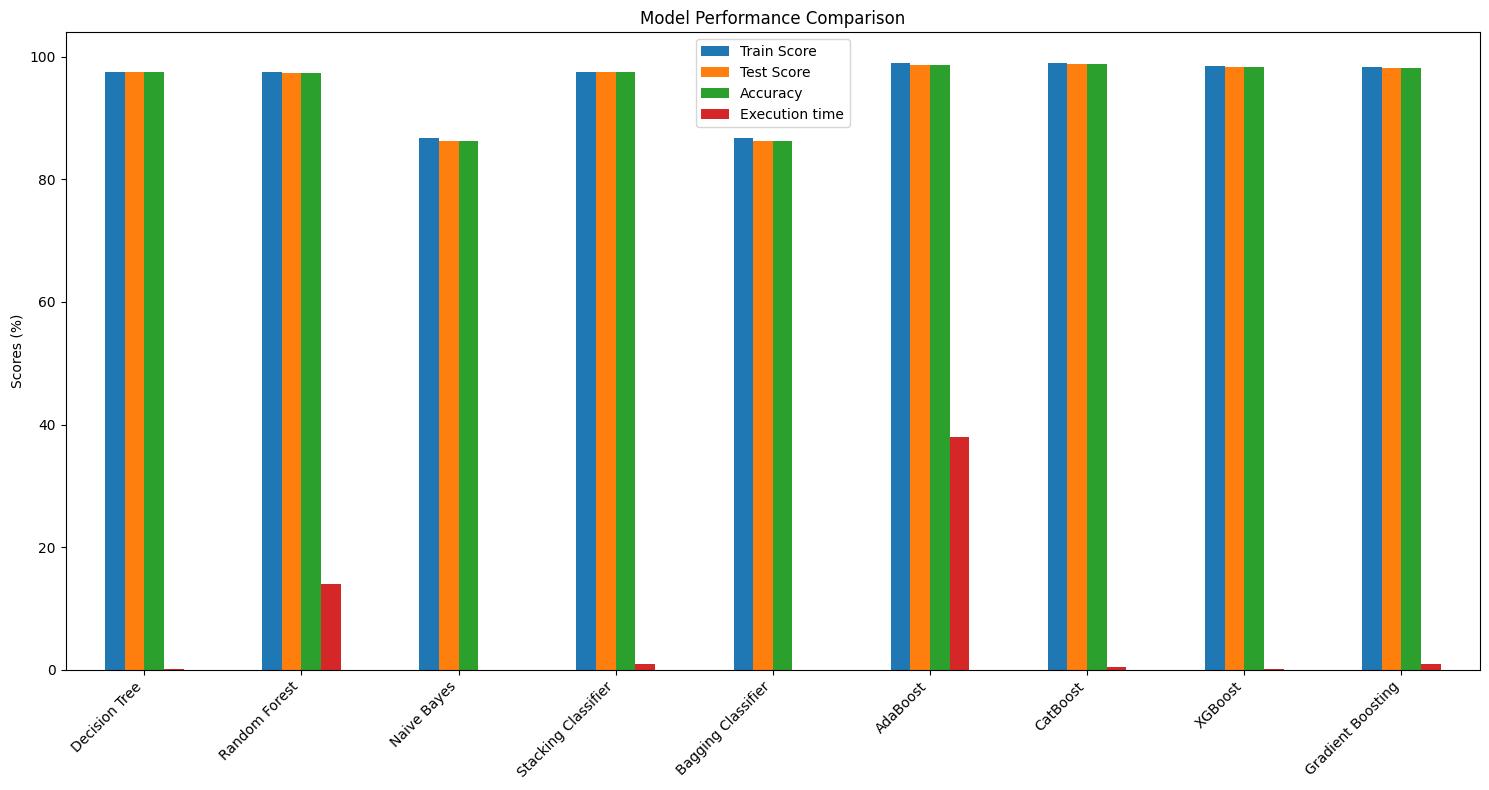

In [43]:
# 1. Bar Plots for Train, Test, Accuracy and Execution time (in minutes)
plt.figure(figsize=(15, 8))
df_transposed.plot(kind='bar', figsize=(15, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Scores (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

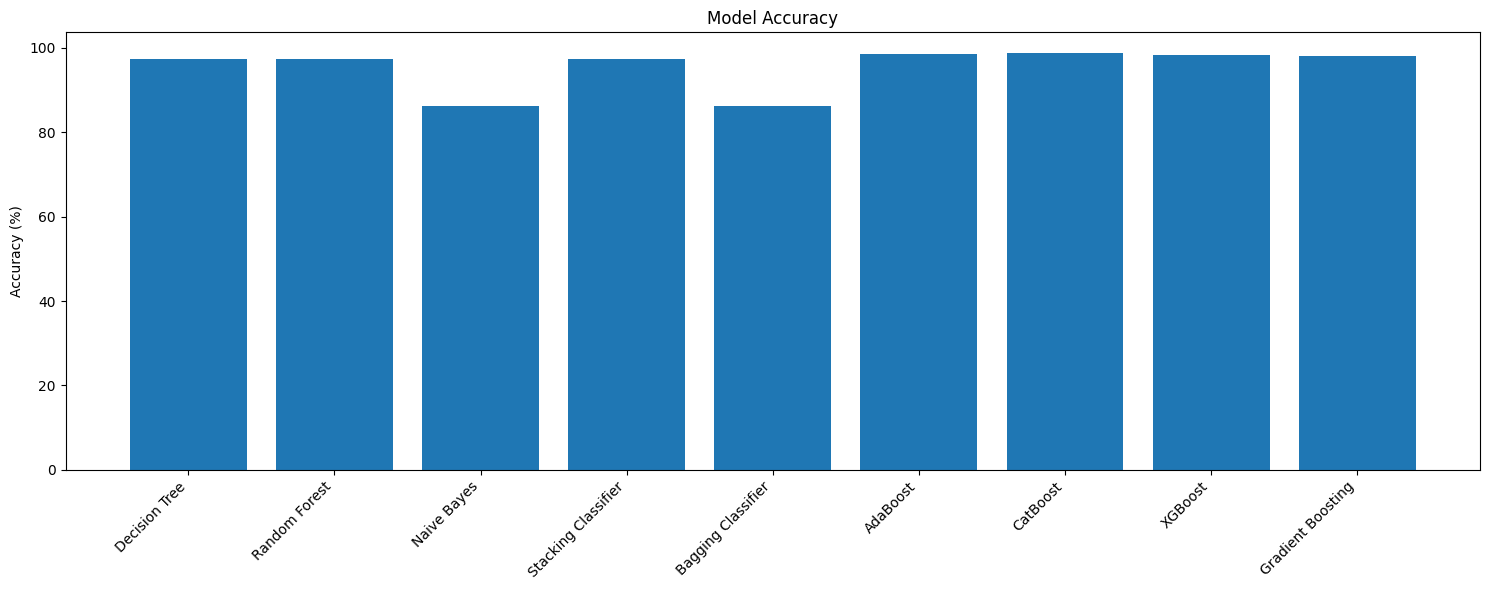

In [44]:
# 2. Accuracy bar chart
plt.figure(figsize=(15, 6))
plt.bar(df_transposed.index, df_transposed['Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

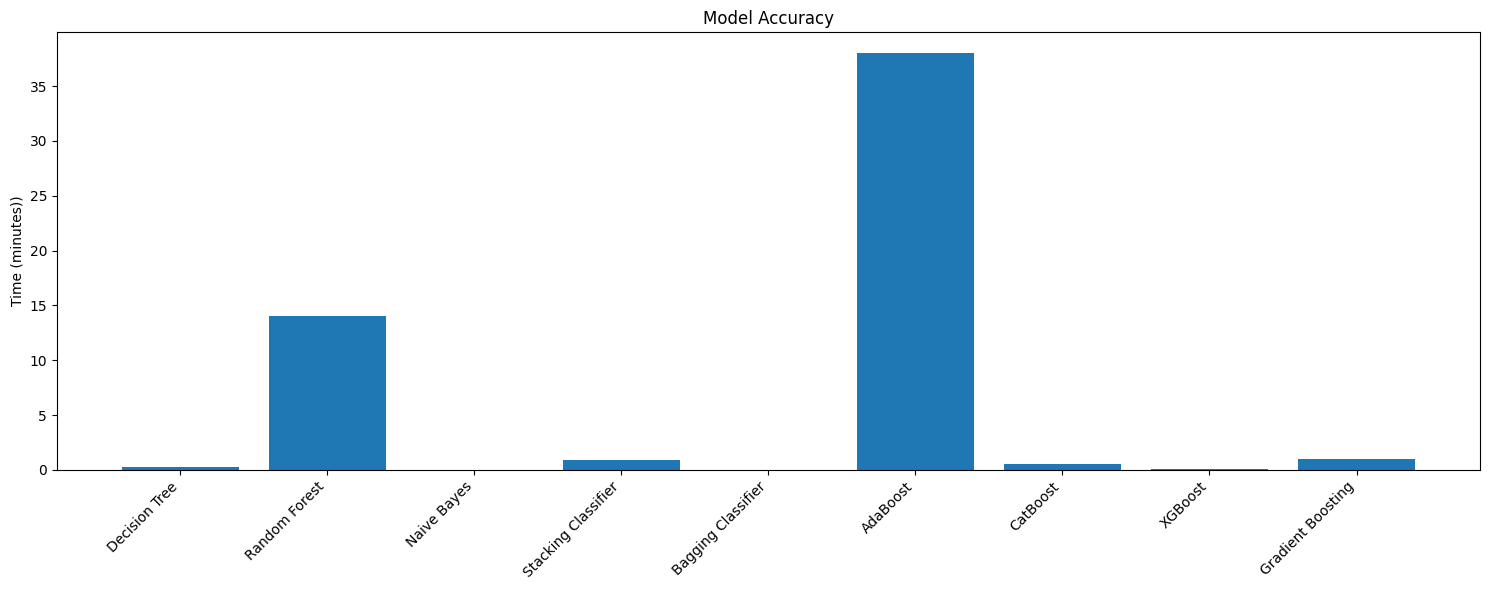

In [49]:
# 2. Accuracy bar chart
plt.figure(figsize=(15, 6))
plt.bar(df_transposed.index, df_transposed['Execution time'])
plt.title('Model Accuracy')
plt.ylabel('Time (minutes))')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [51]:
X_train_final.columns

Index(['count', 'service', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'serror_rate', 'dst_host_serror_rate', 'diff_srv_rate',
       'srv_serror_rate', 'dst_host_count', 'dst_host_same_srv_rate',
       'protocol_type'],
      dtype='object')